# Python intro

Topics for today

- NumPy arrays and vectorization
- Styleguides
- Plots

### Use numpy arrays, not lists!

- Available all necessary math operations with vectors, matrices and tensors
- Optimized implementation: more details in the next week lectures
- Easy to use!

In [4]:
import numpy as np

n = 3
A = np.random.rand(n, n)
x = np.random.randn(n)
print(A)
print(A @ x)
print(A.dot(x))
print(np.dot(A, x))
print(A * x)

[[0.03996362 0.53578772 0.49584479]
 [0.53115827 0.83925501 0.60050346]
 [0.05986429 0.97262627 0.09736688]]
[-0.97141524 -1.29002282 -0.32234162]
[-0.97141524 -1.29002282 -0.32234162]
[-0.97141524 -1.29002282 -0.32234162]
[[-0.00718049 -0.0755073  -0.88872745]
 [-0.09543615 -0.11827423 -1.07631244]
 [-0.01075615 -0.13706993 -0.17451554]]


In [5]:
print("Trace of the matrix =", np.trace(A))
print("Diagonal of the matrix =", np.diag(A))
print("Different sums")
print("Sum all elements in the matrix", np.sum(A))
print("Sum all evelements over rows \n {} \n and columns \n {}".format(np.sum(A, 1), np.sum(A, 0)))
print("Inverse matrix =", np.linalg.inv(A))

Trace of the matrix = 0.9765855145302441
Diagonal of the matrix = [0.03996362 0.83925501 0.09736688]
Different sums
Sum all elements in the matrix 4.172370322265828
Sum all evelements over rows 
 [1.07159613 1.97091675 1.12985745] 
 and columns 
 [0.63098619 2.347669   1.19371513]
Inverse matrix = [[-2.47796988  2.1215973  -0.46564168]
 [-0.07778224 -0.127227    1.18077282]
 [ 2.30052517 -0.03351864 -1.23836101]]


### Broadcasting

-  Is it possible to compute $A + x$ for the matrix $A$ and vector $x$?

In [8]:
print(A)
print(x)
print(A + x)
print(A + x[:, None])
print(A * x)
print(A / x)

[[0.03996362 0.53578772 0.49584479]
 [0.53115827 0.83925501 0.60050346]
 [0.05986429 0.97262627 0.09736688]]
[-0.17967555 -0.14092764 -1.7923501 ]
[[-0.13971193  0.39486008 -1.29650531]
 [ 0.35148272  0.69832737 -1.19184663]
 [-0.11981126  0.83169863 -1.69498321]]
[[-0.13971193  0.35611217  0.31616924]
 [ 0.39023063  0.69832737  0.45957582]
 [-1.7324858  -0.81972383 -1.69498321]]
[[-0.00718049 -0.0755073  -0.88872745]
 [-0.09543615 -0.11827423 -1.07631244]
 [-0.01075615 -0.13706993 -0.17451554]]
[[-0.22242102 -3.80186397 -0.27664505]
 [-2.95620786 -5.95521932 -0.33503692]
 [-0.33317997 -6.90160043 -0.05432359]]


### And what about columns?

In [9]:
print(A)
print(x)
print(A + x[:, np.newaxis])

[[0.03996362 0.53578772 0.49584479]
 [0.53115827 0.83925501 0.60050346]
 [0.05986429 0.97262627 0.09736688]]
[-0.17967555 -0.14092764 -1.7923501 ]
[[-0.13971193  0.35611217  0.31616924]
 [ 0.39023063  0.69832737  0.45957582]
 [-1.7324858  -0.81972383 -1.69498321]]


### One more example

In [14]:
# i = np.arange(4)
# j = np.arange(4)
# print(i)
# mat = i[:, None] - j[None, :]
# print(mat)
# print(i.shape)
# print(i[:, None].shape)
n = 10
m = 5
A = np.random.randn(m, n)
B = np.random.randn(n, m)
print(A @ B)
print((A @ B).T - (B.T @ A.T))

[[ 2.87119268  1.00660454  4.99540391  1.13794495 -1.6399003 ]
 [-3.78171345 -0.61834493 -4.07242142  1.37387972 -4.80561254]
 [-0.72752942 -2.22184308  5.25433511 -1.55149477 -2.04523844]
 [ 1.2780321  -0.34203354  0.22580307 -0.40015915  4.9352036 ]
 [ 3.15900128  2.01372584 -2.009067   -5.04810387  1.38600269]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### No loops!

- Avoid loops wherever its possible!
- Loops in Python are very slow
- Use initializers from NumPy

In [15]:
%%timeit
a = []
n = 100000
for i in range(n):
    a.append(1)

7.78 ms ± 85.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%%timeit 
a = np.ones(n)

1.96 µs ± 20.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
%%timeit 
a = [1 for i in range(n)]

633 ns ± 4.18 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [29]:
%%timeit 
a = [1] * n

122 ns ± 0.578 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [26]:
print(np.zeros(3))
print(np.ones((3, 3)))
print(np.eye(3))
print(np.arange(3))

[0. 0. 0.]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[0 1 2]


## Other useful info

- All basic matrix decompositions can be found in NumPy
- Matrix functions
- Methods for large scale problem can be found in SciPy and we will introduce them in the second part of the course

### Styleguides

- You write code not for you, but for people who will read it!
- Remember about proper naming
- Spaces between math operators and arguments
- PEP8 (PEP = Python Enhancement Proposal) http://legacy.python.org/dev/peps/pep-0008/
- Google Python Styleguide: http://google.github.io/styleguide/pyguide.html 

## Plotting

- Use matplotlib library
- Check the following parts of plots
    - Scale (log vs. linear)
    - Fontsize in axis labels
    - Fontsize in ticks
    - Fontsize in legend
    - Clear difference between lines colours and/or markers
    - Grid if necessary

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
c = 1.
num_points = 100
method_1 = [c / k**5 for k in range(1, num_points)]
method_2 = [c * 0.5**k for k in range(1, num_points)]

Text(0.5, 0, 'Number of iterations')

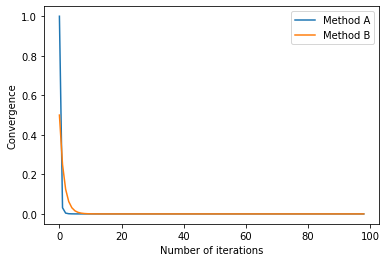

In [32]:
plt.plot(method_1, label="Method A")
plt.plot(method_2, label="Method B")
plt.legend()
plt.ylabel("Convergence")
plt.xlabel("Number of iterations")

### If you leave this plot as it is, you will get penalty!

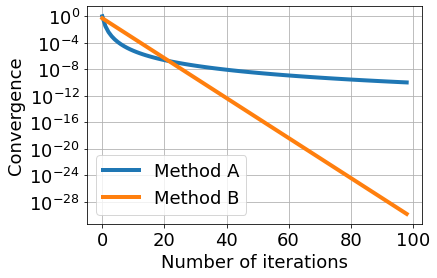

In [34]:
plt.plot(method_1, label="Method A", linewidth=4)
plt.plot(method_2, label="Method B", linewidth=4)
plt.legend(fontsize=18)
plt.ylabel("Convergence", fontsize=18)
plt.xlabel("Number of iterations", fontsize=18)
plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

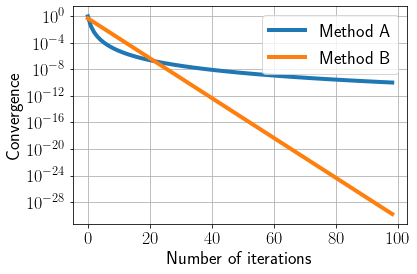

In [36]:
plt.rc("text", usetex=True)
plt.plot(method_1, label="Method A", linewidth=4)
plt.plot(method_2, label="Method B", linewidth=4)
plt.legend(fontsize=18)
plt.ylabel("Convergence", fontsize=18)
plt.xlabel("Number of iterations", fontsize=18)
plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

Text(0.5, 1.0, 'Demo title  $x^4$')

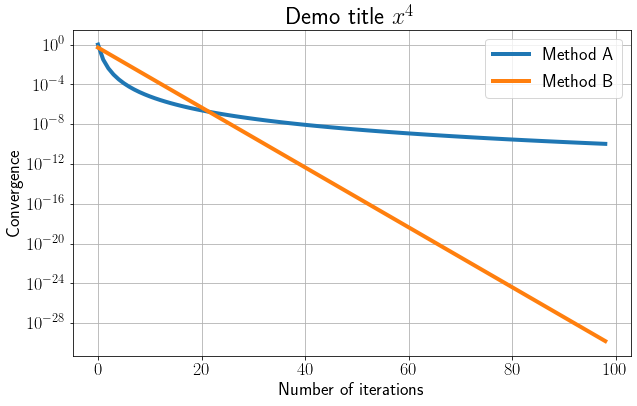

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(method_1, label="Method A", linewidth=4)
plt.plot(method_2, label="Method B", linewidth=4)
plt.legend(fontsize=18)
plt.ylabel("Convergence", fontsize=18)
plt.xlabel("Number of iterations", fontsize=18)
plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)
plt.title(r"Demo title  $x^4$", fontsize=24)

## Summary

- Use NumPy objects
- Check styleguides to write readable code!
- Make nice plots with clear desciptions and conclusions